In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
sensex = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\BSE Sensex Data.xlsx")
bonds = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\India Bond Yeild Data.xlsx")
nifty_50 = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Nifty 50 Data.xlsx") 
gold = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Gold Rates Data.xlsx")
USD_INR = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\USD_INR Data.xlsx")

# Check the structure of the datasets
print("Sensex Data:")
print(sensex.head())
print("\nBonds Data:")
print(bonds.head())
print("\nNifty 50 Data:")
print(nifty_50.head())
print("\nGold Data:")
print(gold.head())
print("\nUSD_INR Data:")
print(USD_INR.head())

Sensex Data:
        Date     Price      Open      High       Low  Change %
0 2024-03-01  73651.35  72606.31  74245.17  71674.42    0.0159
1 2024-02-01  72500.30  71998.78  73413.93  70809.84    0.0104
2 2024-01-01  71752.11  72218.39  73427.59  70001.60   -0.0068
3 2023-12-01  72240.26  67181.15  72484.34  67149.07    0.0784
4 2023-11-01  66988.44  63829.87  67069.89  63550.46    0.0487

Bonds Data:
        Date  Price   Open   High    Low  Change %
0 2024-03-01  7.052  7.052  7.052  7.052   -0.0037
1 2024-02-01  7.078  7.078  7.078  7.078   -0.0092
2 2024-01-01  7.144  7.207  7.239  7.134   -0.0045
3 2023-12-01  7.176  7.293  7.298  7.147   -0.0142
4 2023-11-01  7.279  7.376  7.376  7.194   -0.0098

Nifty 50 Data:
        Date     Price      Open      High      Low  Change %
0 2024-03-01  22326.90  22048.30  22526.60  21710.2    0.0157
1 2024-02-01  21982.80  21780.65  22297.50  21530.2    0.0118
2 2024-01-01  21725.70  21727.75  22124.15  21137.2   -0.0003
3 2023-12-01  21731.40  20

In [2]:
# Function to calculate daily returns
def calculate_daily_returns(df):
    df['Return'] = df['Price'].pct_change()
    return df

# Apply the function to all datasets
sensex = calculate_daily_returns(sensex)
bonds = calculate_daily_returns(bonds)
nifty_50 = calculate_daily_returns(nifty_50)
gold = calculate_daily_returns(gold)
USD_INR = calculate_daily_returns(USD_INR)

# Combine all returns into a single DataFrame
returns = pd.DataFrame({
    'Sensex': sensex['Return'],
    'Bonds': bonds['Return'],
    'Nifty 50': nifty_50['Return'],
    'Gold': gold['Return'],
    'USD_INR': USD_INR['Return']
})

# Drop NaN values
returns = returns.dropna()

print("Daily Returns Data:")
print(returns.head())

Daily Returns Data:
     Sensex     Bonds  Nifty 50      Gold   USD_INR
1 -0.015628  0.003687 -0.015412 -0.077410 -0.005399
2 -0.010320  0.009325 -0.011696  0.001314  0.002352
3  0.006803  0.004479  0.000262  0.006999  0.001143
4 -0.072699  0.014353 -0.073546 -0.016266  0.002007
5 -0.046478  0.009891 -0.052329 -0.021491 -0.001212


Covariance Matrix:
            Sensex     Bonds  Nifty 50      Gold   USD_INR
Sensex    0.002405  0.000108  0.002412  0.000024 -0.000365
Bonds     0.000108  0.000657  0.000106 -0.000053  0.000049
Nifty 50  0.002412  0.000106  0.002435  0.000026 -0.000371
Gold      0.000024 -0.000053  0.000026  0.001530 -0.000121
USD_INR  -0.000365  0.000049 -0.000371 -0.000121  0.000220


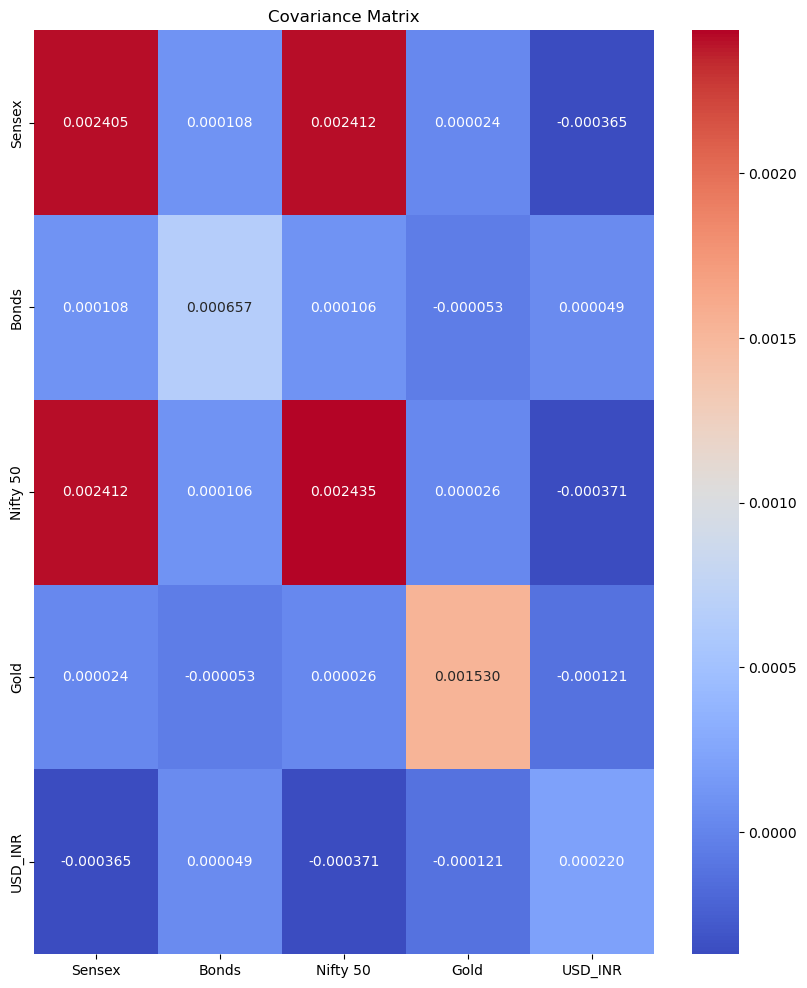

In [4]:
# Calculate the covariance matrix
cov_matrix = returns.cov()

# Display covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Plot the covariance matrix for better visualization
plt.figure(figsize=(10,12))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".6f")
plt.title('Covariance Matrix')
plt.show()

In [28]:
# Calculate variance and volatility
variance = np.diag(cov_matrix)
volatility = variance ** 0.5

# Display variance and volatility
print("Variance:")
print(variance)
print("Volatility:")
print(volatility)

Variance:
[0.00240486 0.00065677 0.00243465 0.00152972 0.00021959]
Volatility:
[0.04903939 0.02562743 0.04934217 0.03911159 0.01481852]


In [29]:
import numpy as np
from scipy.optimize import minimize

# Function to calculate risk contributions
def risk_contributions(weights, cov_matrix):
    port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return weights * np.dot(cov_matrix, weights) / port_variance

# Function to minimize
def objective_function(weights, cov_matrix):
    risk_contrib = risk_contributions(weights, cov_matrix)
    return np.sum((risk_contrib - np.mean(risk_contrib))**2)  # Minimize deviation from equal risk

# Initial weights (equal distribution)
num_assets = len(cov_matrix)
initial_weights = np.ones(num_assets) / num_assets

# Constraints (weights must sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))

# Optimize
result = minimize(objective_function, initial_weights, args=(cov_matrix,), 
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x
print("Optimal Weights:", optimal_weights) # Weights that equalize the risk contribution of each asset.

Optimal Weights: [0.1522038  0.41265417 0.15133537 0.28380666 0.        ]


In [33]:
# Calculate risk contributions based on optimal weights
risk_contrib = risk_contributions(optimal_weights, cov_matrix)

# Display risk contributions
print("Risk Contributions:", risk_contrib)
print("Total Portfolio Risk:", np.sqrt(np.sum(risk_contrib)))
# optimization process determined this asset does not contribute to the risk in a beneficial way.

Risk Contributions: [ 0.25000996  0.2498667   0.25001706  0.25010628 -0.        ]
Total Portfolio Risk: 0.9999999999999999


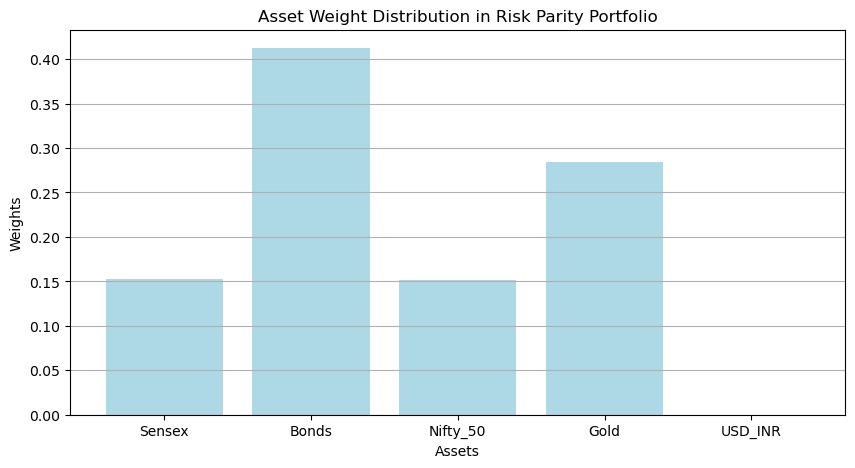

In [1]:
import matplotlib.pyplot as plt

# Plotting weight distribution
plt.figure(figsize=(10, 5))
plt.bar(['Sensex', 'Bonds', 'Nifty_50', 'Gold', 'USD_INR'], [0.1522038, 0.41265417, 0.15133537, 0.28380666, 0.        ], color='lightblue')
plt.title('Asset Weight Distribution in Risk Parity Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.grid(axis='y')
plt.show()

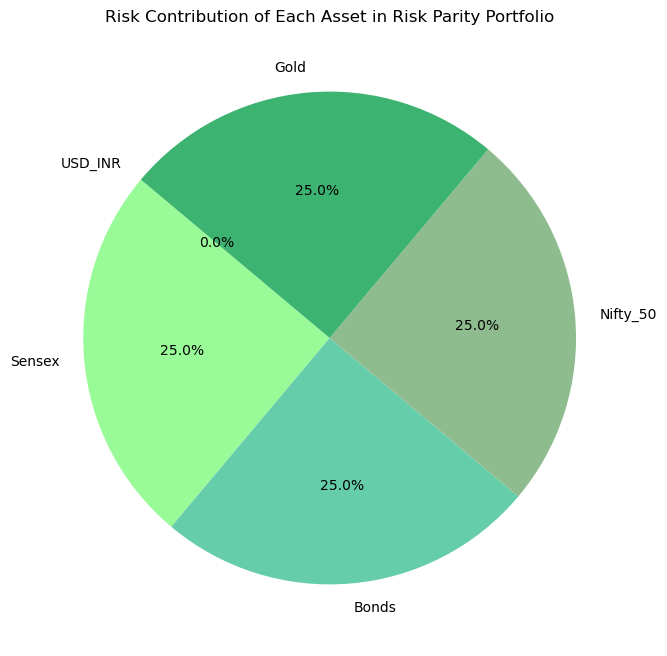

In [2]:
import matplotlib.pyplot as plt

# Original risk contribution values for Risk Parity Portfolio
risk_contributions = [0.25000996, 0.2498667, 0.25001706, 0.25010628, 0.0]
asset_names = ['Sensex', 'Bonds', 'Nifty_50', 'Gold', 'USD_INR']

# Convert to percentages
risk_contributions_percentage = [val * 100 for val in risk_contributions]

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_contributions_percentage, labels=asset_names, autopct='%1.1f%%', startangle=140, colors=['#98fb98', '#66cdaa', '#8fbc8f', '#3cb371', '#2e8b57'])
plt.title('Risk Contribution of Each Asset in Risk Parity Portfolio')
plt.show()